# Experiment 1

- Few Parameters (2x2) => 4 model runs
- existing market pressure as the initial prices are not proportional to trade sizes
- 5 LPs providing entirety of respective tokens (1-5) each
- one trader executing random actions with probabilities:
    - 'sell_r2_for_r1': 0.5,
    - 'sell_r1_for_r2': 0,
    - 'sell_r4_for_r3': 0.25,
    - 'sell_r3_for_r4': 0.25
- asset 5 is not affected by trader's actions

## Setup for initialization

- Asset balances in the Omnipool:
    - Asset 1: 7,000
    - Asset 2: 90,000
    - Asset 3: 13,000,000
    - Asset 4: 8,300,000
- LERNA balances in the Omnipool:
    - Against Asset 1: 117,000,000
    - Against Asset 2: 109,000,000
    - Against Asset 3: 80,000,000
    - Against Asset 4: 15,500,000

In [1]:
import numpy as np

In [2]:
asset1 = 7000
asset2 = 90000
asset3 = 13000000
asset4 = 8300000
asset5 = 100000

# reassign to 0-4

In [3]:
initial_assets_in_pool = np.array([asset1, asset2, asset3, asset4, asset5])
initial_assets_in_pool

array([    7000,    90000, 13000000,  8300000,   100000])

In [4]:
lerna1 = 117000000
lerna2 = 109000000
lerna3 = 80000000
lerna4 = 15500000
lerna5 = 100000


In [5]:
initial_lerna_in_pool = np.array([lerna1, lerna2, lerna3, lerna4, lerna5])
initial_lerna_in_pool

array([117000000, 109000000,  80000000,  15500000,    100000])

In [6]:
initial_prices_in_pool = initial_lerna_in_pool / initial_assets_in_pool 
#initial_prices_in_pool = initial_assets_in_pool / initial_lerna_in_pool ## this is the WRONG one#
## Changed for the purpose of 1:1 shares to asset ratios and consequently prices
#initial_prices_in_pool = initial_assets_in_pool / initial_assets_in_pool 
## Changed for the purpose of 1:1 shares to asset ratios and consequently prices
initial_prices_in_pool

array([1.67142857e+04, 1.21111111e+03, 6.15384615e+00, 1.86746988e+00,
       1.00000000e+00])

In [7]:
#data_f['int'] = data_f['test'].astype('int64')

### calculate prices (denominated in LERNA)

In [8]:
p1 = lerna1 / asset1 
p2 = lerna2 / asset2  
p3 = lerna3 / asset3 
p4 = lerna4 / asset4  
p5 = lerna5 / asset5 
prices = [p1, p2, p3, p4, p5]
prices = initial_prices_in_pool
prices

array([1.67142857e+04, 1.21111111e+03, 6.15384615e+00, 1.86746988e+00,
       1.00000000e+00])

In [9]:
#from model.model_initialization import * 
#initialize_model([1000000, 1500000, 2000000, 2500000, 3000000], 100, 0.01, 0.00)

In [10]:
#########################################################
#           import of packages & dependencies
#########################################################
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.model_initialization import * 

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


#########################################################
#     setting of experiment variables & parameters
#########################################################

# fee_levels_total = 0.005, 0.050
# fee_level_assets = fee_levels_total / 2
# fee_level_hdx = fee_levels_total / 2

fee_level_assets = (0.0000, 0.0001, 0.0002, 0.0003, 0.0004) #10-50bps
fee_level_assets = (0.0000, 0.0001)
fee_level_assets = [0.0001]
fee_level_hdx = 0.01
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
#trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
#liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)
trade_volume = [100, 110, 120]
trade_volume = [1, 2] ##scale for reasonable size required
trade_volume = [1] ##scale for reasonable size required
#liquidity_providers = [1000000, 1500000, 2000000, 2500000, 3000000]
liquidity_providers = initial_lerna_in_pool

sim_nr = 0

#########################################################
#     specification of agent (for non-hard-coded calculations)
#########################################################

performance_of_agent = 'LP3'


if performance_of_agent == 'LP1':
    asset_of_agent = 'omniR1'
elif performance_of_agent == 'LP2':
    asset_of_agent = 'omniR2'
elif performance_of_agent == 'LP3':
    asset_of_agent = 'omniR3'

#########################################################
#     preparation of empty result matrix
#########################################################

m=len(trade_volume)
n=len(fee_level_assets)
matrix = np.ndarray(shape = (m,n), dtype = int)
matrix1 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix2 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix3 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix4 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix5 = np.ndarray(shape = (m,n), dtype = int).astype('int64')
matrix_ror = np.ndarray(shape = (m,n), dtype = int)
matrix_ror1 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror2 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror3 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror4 = np.ndarray(shape = (m,n), dtype = float)
matrix_ror5 = np.ndarray(shape = (m,n), dtype = float)


#########################################################
#     repeated simulation runs with above parameters
#########################################################


for i in range(len(fee_level_assets)):
    for j in range(len(trade_volume)):
        #########################################################
        # initialize model with starting conditions for each run
        #########################################################
        
        config_params = initialize_model(initial_lerna_in_pool, trade_volume[j], fee_level_assets[i], fee_level_hdx, initial_prices_in_pool, initial_assets_in_pool)
        
        #########################################################
        # run model with above initialization
        #########################################################
        
        config_dict, state = init_utils.get_configuration(config_params)
        
        print(state)
        print(config_dict)

        pd.options.mode.chained_assignment = None  # default='warn'
        pd.options.display.float_format = '{:.2f}'.format
        
        run.config(config_dict, state)
        events = run.run()
        
        rdf, agent_df = processing.postprocessing(events)

        #########################################################
        # calculate profitability metrics; change in pool values
        #########################################################
        
         
        print(sim_nr)
        total_timesteps = config_params.get('action_ls')[0][1] #grabbing the same total timestep as through initialize_model
        #total_timesteps = 1000
        first_timestep = 1
        print(total_timesteps)
        
        ## merge agent and pool dataframes
        profit_results = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])
        
        ## assign additional columns
        profit_results['val_pool'] = profit_results.apply(lambda x: processing.val_pool(x), axis=1)
        initial_values = config_params['initial_values']
        agent_d = config_params['agent_d']
        withdraw_agent_d = processing.get_withdraw_agent_d(initial_values, agent_d)
        print(withdraw_agent_d)
        profit_results['val_hold'] = profit_results.apply(lambda x: processing.val_hold(x, withdraw_agent_d), axis=1)
        #profit_results['IL'] = profit_results.apply(lambda x: x['val_pool']/x['val_hold'] - 1, axis=1)
        profit_results['pool_val'] = profit_results.apply(lambda x: processing.pool_val(x), axis=1)
        
        ## calculate profits from 'val_pool' for initialized agent     
        profit_results1 = profit_results[profit_results['simulation'] == sim_nr]
        profit_results2 = profit_results1[profit_results1['timestep'] == total_timesteps]
        profit_results3 = profit_results1[profit_results1['timestep'] == first_timestep]
        profit_results4 = profit_results2[profit_results2['agent_label'] == performance_of_agent] #define selection for final timestep for desired agent (LP1 / LP2 / ??)
        profit_results5 = profit_results3[profit_results3['agent_label'] == performance_of_agent] #define selection for first timestep for desired agent (LP1 / LP2 / ??)
 
        ## calculate profits from 'val_pool' for hardcored agents (workaround)
        profit_results41 = profit_results2[profit_results2['agent_label'] == 'LP1']
        profit_results51 = profit_results3[profit_results3['agent_label'] == 'LP1']
        profit_results42 = profit_results2[profit_results2['agent_label'] == 'LP2']
        profit_results52 = profit_results3[profit_results3['agent_label'] == 'LP2']
        profit_results43 = profit_results2[profit_results2['agent_label'] == 'LP3']
        profit_results53 = profit_results3[profit_results3['agent_label'] == 'LP3']
        profit_results44 = profit_results2[profit_results2['agent_label'] == 'LP4']
        profit_results54 = profit_results3[profit_results3['agent_label'] == 'LP4']
        profit_results45 = profit_results2[profit_results2['agent_label'] == 'LP5']
        profit_results55 = profit_results3[profit_results3['agent_label'] == 'LP5']
        
        profit_sim0 = profit_results4['val_pool'].iloc[0] - profit_results5['val_pool'].iloc[0] # 
        profit_sim1 = profit_results41['val_pool'].iloc[0] - profit_results51['val_pool'].iloc[0] # profit for LP1
        profit_sim2 = profit_results42['val_pool'].iloc[0] - profit_results52['val_pool'].iloc[0] # profit for LP2
        profit_sim3 = profit_results43['val_pool'].iloc[0] - profit_results53['val_pool'].iloc[0] # profit for LP3
        profit_sim4 = profit_results44['val_pool'].iloc[0] - profit_results54['val_pool'].iloc[0] # profit for LP2
        profit_sim5 = profit_results45['val_pool'].iloc[0] - profit_results55['val_pool'].iloc[0] # profit for LP3
        
        ## calculate 'rate of return' in basispoints
        ror0 = (profit_sim0 / agent_d[performance_of_agent][asset_of_agent]) * 100
        ror1 = (profit_sim1 / agent_d['LP1']['omniR1']) * 100 # RoR for LP1 in %
        ror2 = (profit_sim2 / agent_d['LP2']['omniR2']) * 100 # RoR for LP2 in %
        ror3 = (profit_sim3 / agent_d['LP3']['omniR3']) * 100 # RoR for LP3 in %
        ror4 = (profit_sim4 / agent_d['LP4']['omniR4']) * 100 # RoR for LP4 in %
        ror5 = (profit_sim5 / agent_d['LP5']['omniR5']) * 100 # RoR for LP5 in %
                    
        #########################################################
        # assign metrics (profit, ror) to empty matrix
        #########################################################
        
        #matrix[j][i] = np.random.randint(1, 100 + 1)
        #matrix[j][i] = trade_volume[i]*liquidity[j]
        matrix[j][i] = profit_sim0
        matrix1[j][i] = profit_sim1
        matrix2[j][i] = profit_sim2
        matrix3[j][i] = profit_sim3
        matrix4[j][i] = profit_sim4
        matrix5[j][i] = profit_sim5
        #matrix1[j][i] = profit_sim1
        matrix_ror[j][i] = ror0
        matrix_ror1[j][i] = ror1
        matrix_ror2[j][i] = ror2
        matrix_ror3[j][i] = ror3
        matrix_ror4[j][i] = ror4
        matrix_ror5[j][i] = ror5
        #matrix_ror1[j][i] = ror1
        
        #########################################################
        ## increase simulation count
        #########################################################
        
        sim_nr += 1



{'external': {}, 'AMM': {'R': [7000, 90000, 13000000, 8300000, 100000], 'Q': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A': [0, 0, 0, 0, 0], 'B': [0.0, 0.0, 0.0, 0.0, 0.0], 'D': 0, 'T': None, 'H': None, 'token_list': ['R1', 'R2', 'R3', 'R4', 'R5'], 'fee_assets': 0.0001, 'fee_HDX': 0.01}, 'uni_agents': {'Trader': {'q': 1000000, 's': [0, 0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0, 0]}, 'LP1': {'q': 0, 's': [117000000, 0, 0, 0, 0], 'r': [0, 0, 0, 0, 0], 'p': [16714.285714285714, 0, 0, 0, 0]}, 'LP2': {'q': 0, 's': [0, 109000000, 0, 0, 0], 'r': [0, 0, 0, 0, 0], 'p': [0, 1211.111111111111, 0, 0, 0]}, 'LP3': {'q': 0, 's': [0, 0, 80000000, 0, 0], 'r': [0, 0, 0, 0, 0], 'p': [0, 0, 6.153846153846154, 0, 0]}, 'LP4': {'q': 0, 's': [0, 0, 0, 15500000, 0], 'r': [0, 0, 0, 0, 0], 'p': [0, 0, 0, 1.8674698795180722, 0]}, 'LP5': {'q': 0, 's': [0, 0, 0, 0, 100000], 'r': [0, 0, 0, 0

delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 1800
delta_Q_new -1543664.7870587471
oldQ 92497353.65602835
newQ 90953688.8689696
delta_Q_before distinction -1543664.7870587409
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 1800
fee_assets 0.0001
fee_LHDX 0.01
delta_q 1528228.1391881602
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 133336403.9647299
newQ 134864632.10391808
delta_Q_before distinction 1528228.1391881704
#                         #
I would SWAP now
#                         #
old state is {'R': [6142.521733535431, 106057.11896563118, 13253178.76566764, 7580374.4

oldQ 86723936.7133042
newQ 85365545.49553083
delta_Q_before distinction -1358391.217773378
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 1800
fee_assets 0.0001
fee_LHDX 0.01
delta_q 1344807.3055956461
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 139050398.5922451
newQ 140395205.89784074
delta_Q_before distinction 1344807.3055956364
#                         #
I would SWAP now
#                         #
old state is {'R': [5833.743358980247, 114917.62022712833, 13880565.724892458, 6299512.839932553, 100000], 'Q': [140395341.67918366, 85365545.49553083, 74925872.96347235, 20424562.866734203, 100000.0], 'S': [117000000.0, 109000000.0, 80000000.0, 15500000.0, 100000.0], 'A':

trade parameters are {'agent_id': 'Trader', 'token_buy': 'R4', 'amount_sell': 195000, 'token_sell': 'R3', 'action_id': 'Trade'}
#                         #
delta_Q is 0
delta_R is 195000
i_buy is 3
i_sell is 2
trade_type is sell
#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 195000
fee_assets 0.0001
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 195000
delta_Q_new -1063098.4011249065
oldQ 75832677.6658393
ne

delta_Ri 195000
delta_Q_new -946442.5125161834
oldQ 71522834.96051434
newQ 70576392.44799815
delta_Q_before distinction -946442.5125161856
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the second leg: trading LHDX in for asset
delta_token 195000
fee_assets 0.0001
fee_LHDX 0.01
delta_q 936978.0873910214
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
oldQ 23699930.9928679
newQ 24636909.08025892
delta_Q_before distinction 936978.0873910226
#                         #
I would SWAP now
#                         #
old state is {'R': [5389.302865719464, 133197.37016629166, 14541185.90971928, 5429325.271828374, 100000], 'Q': [151975960.20035037, 73650320.1502789, 71522834.96051434, 23699930.9928679, 100000.0], 'S': [117000000.0, 109000000.

#                         #
#                                           #
I entered the asset swap function in OAMM now
#                                           #
I entered the -sell- trade type now and ready to swap for lhdx with the following parameters
This, by the way, is the first leg: trading asset in for LHDX
delta_token 2.5360873694207027
fee_assets 0.0001
fee_LHDX 0.01
#                                           #
I entered the lhdx (fee) swap function in OAMM now
#                                           #
I entered the lhdx swap function in OAMM now
delta_Q is zero AND delta_R is NOT zero
#                                           #
I entered the swap hdx delta Qi function in OAMM now
delta_Ri 2.5360873694207027
delta_Q_new -76361.40887324285
oldQ 157078135.0623385
newQ 157001773.65346527
delta_Q_before distinction -76361.40887323022
#                                           #
I am still in the -sell- trade type now and ready to swap for lhdx with the following param

{'Trader': {'q': 1000000, 's': [0, 0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0, 0]}, 'LP1': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [7000.0, 0, 0, 0, 0], 'p': [16714.285714285714, 0, 0, 0, 0]}, 'LP2': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 90000.0, 0, 0, 0], 'p': [0, 1211.111111111111, 0, 0, 0]}, 'LP3': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 13000000.0, 0, 0], 'p': [0, 0, 6.153846153846154, 0, 0]}, 'LP4': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 8300000.0, 0], 'p': [0, 0, 0, 1.8674698795180722, 0]}, 'LP5': {'q': 0.0, 's': [0, 0, 0, 0, 0], 'r': [0, 0, 0, 0, 100000.0], 'p': [0, 0, 0, 0, 1.0]}}


## Results

### Absolute Returns for LPs

In [11]:
x_axis_labels = fee_level_assets
y_axis_labels = trade_volume

### Selected Agent

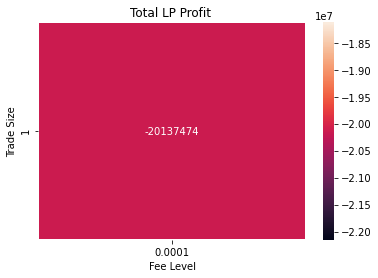

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 1

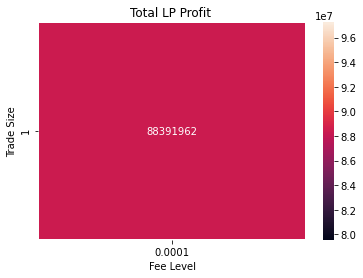

In [13]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 2

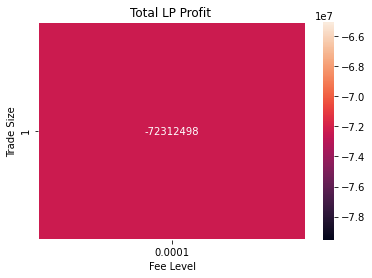

In [14]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix2, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 3

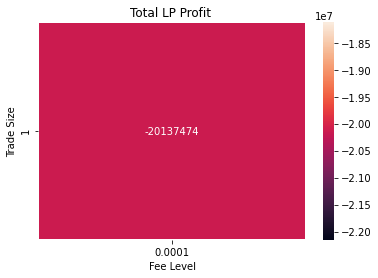

In [15]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix3, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 4

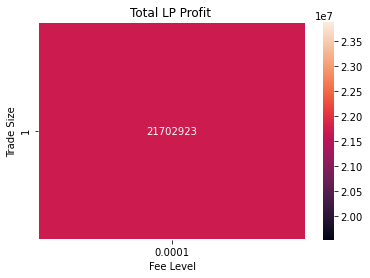

In [16]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix4, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 5

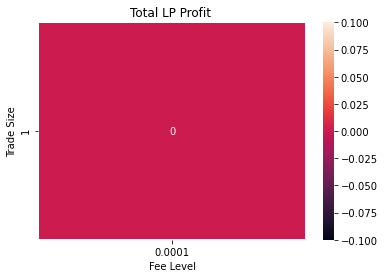

In [17]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix5, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".0f")
ax.set_title("Total LP Profit ")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

## Relative Returns for LPs

In [18]:
matrix_ror

array([[-25]])

In [19]:
x_axis_labels

[0.0001]

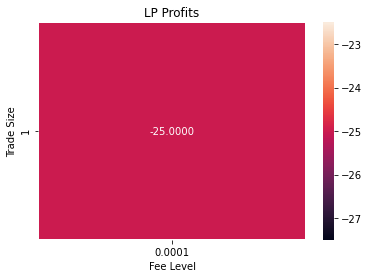

In [20]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 1

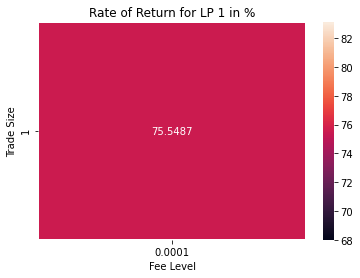

In [21]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 1 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()


### LP 2

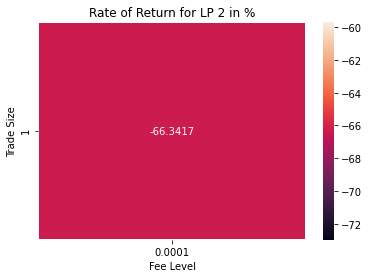

In [22]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror2, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 2 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 3

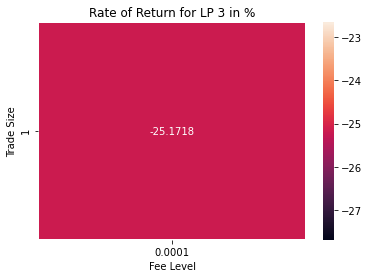

In [23]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror3, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 3 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 4

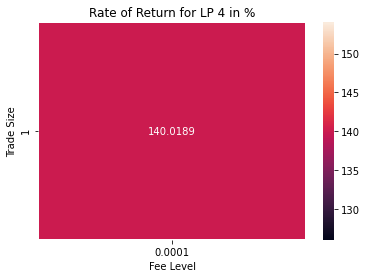

In [24]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror4, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 4 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

### LP 5

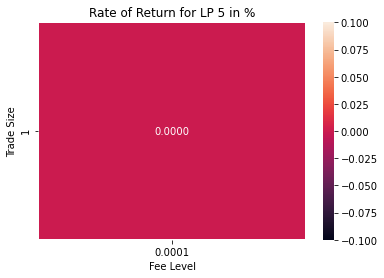

In [25]:
#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix_ror5, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidth=0.5, annot=True, fmt=".4f")
ax.set_title("Rate of Return for LP 5 in %")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Fee Level')
ax.set_ylabel('Trade Size')
plt.show()

[0]


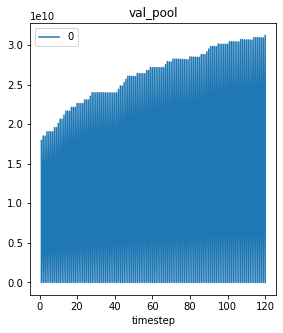

In [26]:
from model import plot_utils as pu
varlist = ['val_pool']
dataframe = profit_results[profit_results['simulation'] == 0]
dataframe = dataframe[dataframe['substep'] == 3]
dataframe = dataframe[dataframe['run'] == 1]
#dataframe = dataframe[dataframe['agent_label'] == 'LP4']
pu.plot_vars(dataframe, varlist)

## Debugging

In [27]:
profit_results

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,...,token_list-1,token_list-2,token_list-3,token_list-4,fee_assets,fee_HDX,n,val_pool,val_hold,pool_val
0,0,0,1,3,1,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,17935398725.63,17935396417.17,321597512.50
1,0,0,1,3,1,LP1,0.00,117000000,0,0,...,R2,R3,R4,R5,0.00,0.01,5,117000000.00,117000000.00,321597512.50
2,0,0,1,3,1,LP2,0.00,0,109000000,0,...,R2,R3,R4,R5,0.00,0.01,5,109000000.00,109000000.00,321597512.50
3,0,0,1,3,1,LP3,0.00,0,0,80000000,...,R2,R3,R4,R5,0.00,0.01,5,80497875.59,80498238.44,321597512.50
4,0,0,1,3,1,LP4,0.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,14999579.54,15001582.53,321597512.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,1,3,120,LP1,0.00,117000000,0,0,...,R2,R3,R4,R5,0.00,0.01,5,205391962.45,214957676.04,320724097.39
716,0,0,1,3,120,LP2,0.00,0,109000000,0,...,R2,R3,R4,R5,0.00,0.01,5,36687501.74,41130258.20,320724097.39
717,0,0,1,3,120,LP3,0.00,0,0,80000000,...,R2,R3,R4,R5,0.00,0.01,5,60360401.35,60920027.35,320724097.39
718,0,0,1,3,120,LP4,0.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,36702502.68,41160881.03,320724097.39


In [28]:
profit_results[['Q-0', 'simulation', 'subset', 'run', 'substep', 'timestep', 'agent_label']].head(20)

,Q-0,simulation,subset,run,substep,timestep,agent_label
0,117000000.00,0,0,1,3,1,Trader
1,117000000.00,0,0,1,3,1,LP1
2,117000000.00,0,0,1,3,1,LP2
3,117000000.00,0,0,1,3,1,LP3
4,117000000.00,0,0,1,3,1,LP4
5,117000000.00,0,0,1,3,1,LP5
6,119116097.77,0,0,1,3,2,Trader
7,119116097.77,0,0,1,3,2,LP1
8,119116097.77,0,0,1,3,2,LP2
9,119116097.77,0,0,1,3,2,LP3


In [29]:
profit_results['Q-0'].unique()

array([1.17000000e+08, 1.19116098e+08, 1.19072178e+08, 1.21108527e+08,
       1.23068003e+08, 1.23021122e+08, 1.24909683e+08, 1.26729514e+08,
       1.28484299e+08, 1.30177464e+08, 1.31812200e+08, 1.33391478e+08,
       1.33336404e+08, 1.34864787e+08, 1.34808490e+08, 1.36288494e+08,
       1.37720666e+08, 1.37661960e+08, 1.39050399e+08, 1.40395342e+08,
       1.40334335e+08, 1.41639625e+08, 1.42905241e+08, 1.44132962e+08,
       1.44068664e+08, 1.44004424e+08, 1.43940241e+08, 1.45137283e+08,
       1.45072087e+08, 1.46236100e+08, 1.47366659e+08, 1.47299445e+08,
       1.48399825e+08, 1.49469439e+08, 1.49400293e+08, 1.49331212e+08,
       1.50375044e+08, 1.50305059e+08, 1.50235138e+08, 1.50165283e+08,
       1.50095493e+08, 1.51118311e+08, 1.51047633e+08, 1.50977020e+08,
       1.51975960e+08, 1.52948261e+08, 1.53894975e+08, 1.54817098e+08,
       1.54742918e+08, 1.55643250e+08, 1.55568277e+08, 1.56447644e+08,
       1.56371894e+08, 1.57231081e+08, 1.57154571e+08, 1.57078135e+08,
      

In [30]:
qcalc = 117000000 / 159024416.08
qcalc

0.7357360767867314

In [31]:
profit_results[['R-0', 'simulation', 'subset', 'run', 'substep', 'timestep', 'agent_label']].head(20)

,R-0,simulation,subset,run,substep,timestep,agent_label
0,7000.00,0,0,1,3,1,Trader
1,7000.00,0,0,1,3,1,LP1
2,7000.00,0,0,1,3,1,LP2
3,7000.00,0,0,1,3,1,LP3
4,7000.00,0,0,1,3,1,LP4
5,7000.00,0,0,1,3,1,LP5
6,6875.67,0,0,1,3,2,Trader
7,6875.67,0,0,1,3,2,LP1
8,6875.67,0,0,1,3,2,LP2
9,6875.67,0,0,1,3,2,LP3


In [32]:
rcalc = 5150.15 / 7000
rcalc

0.7357357142857143

In [33]:
profit_results.columns.unique

<bound method Index.unique of Index(['simulation', 'subset', 'run', 'substep', 'timestep', 'agent_label',
       'q', 's-0', 's-1', 's-2', 's-3', 's-4', 'r-0', 'r-1', 'r-2', 'r-3',
       'r-4', 'p-0', 'p-1', 'p-2', 'p-3', 'p-4', 'R-0', 'R-1', 'R-2', 'R-3',
       'R-4', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'Q-4', 'S-0', 'S-1', 'S-2', 'S-3',
       'S-4', 'A-0', 'A-1', 'A-2', 'A-3', 'A-4', 'B-0', 'B-1', 'B-2', 'B-3',
       'B-4', 'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'val_pool', 'val_hold', 'pool_val'],
      dtype='object')>

#### limit to one agent only

In [34]:
profit_results['agent_label']

0      Trader
1         LP1
2         LP2
3         LP3
4         LP4
        ...  
715       LP1
716       LP2
717       LP3
718       LP4
719       LP5
Name: agent_label, Length: 720, dtype: object

In [35]:
profit_results_trader = profit_results[profit_results['agent_label'] == 'Trader']
profit_results_trader


,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,...,token_list-1,token_list-2,token_list-3,token_list-4,fee_assets,fee_HDX,n,val_pool,val_hold,pool_val
0,0,0,1,3,1,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,17935398725.63,17935396417.17,321597512.50
6,0,0,1,3,2,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,18498432575.20,18498371683.14,321576355.37
12,0,0,1,3,3,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,18486603308.83,18486546119.96,321575920.52
18,0,0,1,3,4,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,19039530697.35,19039268916.65,321555560.52
24,0,0,1,3,5,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,19039522181.90,19039248933.62,321553152.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0,0,1,3,116,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,30937694159.74,30898907211.82,320747296.23
696,0,0,1,3,117,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,30908923145.82,30870248527.68,320746532.78
702,0,0,1,3,118,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,30907477656.84,30870043597.06,320739242.13
708,0,0,1,3,119,Trader,1000000.00,0,0,0,...,R2,R3,R4,R5,0.00,0.01,5,30906195145.92,30869858373.17,320732342.88


In [36]:
profit_results_trader[['timestep','q', 's-0', 's-1', 's-2', 's-3', 's-4', 'r-0', 'r-1', 'r-2', 'r-3',
       'r-4', 'p-0', 'p-1', 'p-2', 'p-3', 'p-4', 'R-0', 'R-1', 'R-2', 'R-3',
       'R-4', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'Q-4', 'S-0', 'S-1', 'S-2', 'S-3',
       'S-4', 'A-0', 'A-1', 'A-2', 'A-3', 'A-4', 'B-0', 'B-1', 'B-2', 'B-3',
       'B-4', 'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'val_pool', 'val_hold', 'pool_val']].head(20)

,timestep,q,s-0,s-1,s-2,s-3,s-4,r-0,r-1,r-2,...,token_list-1,token_list-2,token_list-3,token_list-4,fee_assets,fee_HDX,n,val_pool,val_hold,pool_val
0,1,1000000.00,0,0,0,0,0,1000000.00,1000000.00,1040289.73,...,R2,R3,R4,R5,0.00,0.01,5,17935398725.63,17935396417.17,321597512.50
6,2,1000000.00,0,0,0,0,0,1000124.33,998200.00,1040289.73,...,R2,R3,R4,R5,0.00,0.01,5,18498432575.20,18498371683.14,321576355.37
12,3,1000000.00,0,0,0,0,0,1000121.79,998237.33,1040289.73,...,R2,R3,R4,R5,0.00,0.01,5,18486603308.83,18486546119.96,321575920.52
18,4,1000000.00,0,0,0,0,0,1000237.42,996437.33,1040289.73,...,R2,R3,R4,R5,0.00,0.01,5,19039530697.35,19039268916.65,321555560.52
24,5,1000000.00,0,0,0,0,0,1000237.42,996437.33,1079056.93,...,R2,R3,R4,R5,0.00,0.01,5,19039522181.90,19039248933.62,321553152.37
30,6,1000000.00,0,0,0,0,0,1000237.42,996437.33,1116386.31,...,R2,R3,R4,R5,0.00,0.01,5,19039523576.73,19039230561.23,321550819.84
36,7,1000000.00,0,0,0,0,0,1000237.42,996437.33,921386.31,...,R2,R3,R4,R5,0.00,0.01,5,19039586309.69,19039329745.21,321538912.96
42,8,1000000.00,0,0,0,0,0,1000345.07,994637.33,921386.31,...,R2,R3,R4,R5,0.00,0.01,5,19582151813.88,19581558205.14,321519321.39
48,9,1000000.00,0,0,0,0,0,1000342.54,994680.33,921386.31,...,R2,R3,R4,R5,0.00,0.01,5,19569028354.78,19568445262.76,321518857.22
54,10,1000000.00,0,0,0,0,0,1000443.18,992880.33,921386.31,...,R2,R3,R4,R5,0.00,0.01,5,20101477254.79,20100442347.90,321499974.51


In [37]:
profit_results_trader[['timestep','q', 's-0', 's-1', 's-2', 's-3', 's-4']].head(20)

,timestep,q,s-0,s-1,s-2,s-3,s-4
0,1,1000000.00,0,0,0,0,0
6,2,1000000.00,0,0,0,0,0
12,3,1000000.00,0,0,0,0,0
18,4,1000000.00,0,0,0,0,0
24,5,1000000.00,0,0,0,0,0
30,6,1000000.00,0,0,0,0,0
36,7,1000000.00,0,0,0,0,0
42,8,1000000.00,0,0,0,0,0
48,9,1000000.00,0,0,0,0,0
54,10,1000000.00,0,0,0,0,0


In [38]:
profit_results_trader[['timestep', 'r-0', 'r-1', 'r-2', 'r-3', 'r-4', 'p-0', 'p-1', 'p-2', 'p-3', 'p-4']].head(20)

,timestep,r-0,r-1,r-2,r-3,r-4,p-0,p-1,p-2,p-3,p-4
0,1,1000000.00,1000000.00,1040289.73,863245.66,1000000,0.00,0.00,0.00,0.00,0.00
6,2,1000124.33,998200.00,1040289.73,863245.66,1000000,0.00,0.00,0.00,0.00,0.00
12,3,1000121.79,998237.33,1040289.73,863245.66,1000000,0.00,0.00,0.00,0.00,0.00
18,4,1000237.42,996437.33,1040289.73,863245.66,1000000,0.00,0.00,0.00,0.00,0.00
24,5,1000237.42,996437.33,1079056.93,726491.32,1000000,0.00,0.00,0.00,0.00,0.00
30,6,1000237.42,996437.33,1116386.31,589736.97,1000000,0.00,0.00,0.00,0.00,0.00
36,7,1000237.42,996437.33,921386.31,1239896.16,1000000,0.00,0.00,0.00,0.00,0.00
42,8,1000345.07,994637.33,921386.31,1239896.16,1000000,0.00,0.00,0.00,0.00,0.00
48,9,1000342.54,994680.33,921386.31,1239896.16,1000000,0.00,0.00,0.00,0.00,0.00
54,10,1000443.18,992880.33,921386.31,1239896.16,1000000,0.00,0.00,0.00,0.00,0.00


In [39]:
profit_results_trader[['timestep', 'R-0', 'R-1', 'R-2', 'R-3',
       'R-4', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'Q-4', 'S-0', 'S-1', 'S-2', 'S-3',
       'S-4']].head(20)

,timestep,R-0,R-1,R-2,R-3,R-4,Q-0,Q-1,Q-2,Q-3,Q-4,S-0,S-1,S-2,S-3,S-4
0,1,7000.00,90000.00,12959710.27,8436754.34,100000,117000000.00,109000000.00,80248757.50,15248755.00,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
6,2,6875.67,91800.00,12959710.27,8436754.34,100000,119116097.77,106862745.10,80248757.50,15248755.00,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
12,3,6878.21,91762.67,12959710.27,8436754.34,100000,119072178.05,106906229.96,80248757.50,15248755.00,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
18,4,6762.58,93562.67,12959710.27,8436754.34,100000,121108527.42,104849520.60,80248757.50,15248755.00,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
24,5,6762.58,93562.67,12920943.07,8573508.68,100000,121108527.42,104849520.60,80489579.23,15005525.13,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
30,6,6762.58,93562.67,12883613.69,8710263.03,100000,121108527.42,104849520.60,80722838.97,14769932.85,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
36,7,6762.58,93562.67,13078613.69,8060103.84,100000,121108527.42,104849520.60,79519274.59,15961590.35,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
42,8,6654.93,95362.67,13078613.69,8060103.84,100000,123068003.16,102870453.29,79519274.59,15961590.35,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
48,9,6657.46,95319.67,13078613.69,8060103.84,100000,123021121.74,102916870.53,79519274.59,15961590.35,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00
54,10,6556.82,97119.67,13078613.69,8060103.84,100000,124909683.48,101009426.08,79519274.59,15961590.35,100000.00,117000000.00,109000000.00,80000000.00,15500000.00,100000.00


In [40]:
delta_in_Q = -251244.99560589716 + 248732.54564983887
delta_in_Q

-2512.4499560582917

In [41]:
profit_results_trader[['timestep', 'A-0', 'A-1', 'A-2', 'A-3', 'A-4', 'B-0', 'B-1', 'B-2', 'B-3',
       'B-4', 'D', 'T', 'H']].head(20)

,timestep,A-0,A-1,A-2,A-3,A-4,B-0,B-1,B-2,B-3,B-4,D,T,H
0,1,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2512.45,None,None
6,2,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,23885.00,None,None
12,3,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,24324.20,None,None
18,4,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,44891.29,None,None
24,5,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,47323.59,None,None
30,6,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,49679.51,None,None
36,7,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,61715.16,None,None
42,8,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,81505.83,None,None
48,9,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,81974.64,None,None
54,10,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,101049.09,None,None


In [42]:
profit_results_trader[['timestep', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'val_pool', 'val_hold', 'pool_val']].head(20)

,timestep,token_list-0,token_list-1,token_list-2,token_list-3,token_list-4,fee_assets,fee_HDX,n,val_pool,val_hold,pool_val
0,1,R1,R2,R3,R4,R5,0.00,0.01,5,17935398725.63,17935396417.17,321597512.50
6,2,R1,R2,R3,R4,R5,0.00,0.01,5,18498432575.20,18498371683.14,321576355.37
12,3,R1,R2,R3,R4,R5,0.00,0.01,5,18486603308.83,18486546119.96,321575920.52
18,4,R1,R2,R3,R4,R5,0.00,0.01,5,19039530697.35,19039268916.65,321555560.52
24,5,R1,R2,R3,R4,R5,0.00,0.01,5,19039522181.90,19039248933.62,321553152.37
30,6,R1,R2,R3,R4,R5,0.00,0.01,5,19039523576.73,19039230561.23,321550819.84
36,7,R1,R2,R3,R4,R5,0.00,0.01,5,19039586309.69,19039329745.21,321538912.96
42,8,R1,R2,R3,R4,R5,0.00,0.01,5,19582151813.88,19581558205.14,321519321.39
48,9,R1,R2,R3,R4,R5,0.00,0.01,5,19569028354.78,19568445262.76,321518857.22
54,10,R1,R2,R3,R4,R5,0.00,0.01,5,20101477254.79,20100442347.90,321499974.51
